In [1540]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score



ModuleNotFoundError: No module named 'xgboost'

In [1541]:
data  = pd.read_csv('data/water_potability.csv')





In [1542]:
data.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [1543]:
from sklearn.utils import shuffle
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
notpotable  = data[data['Potability']==0]
potable = data[data['Potability']==1]  

col = data.columns



imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(potable)
potable_imp =  pd.DataFrame(imp.transform(potable), columns = col)


imp.fit(notpotable)
notpotable_imp =  pd.DataFrame(imp.transform(notpotable), columns = col)

data = pd.concat([notpotable_imp ,potable_imp])

data = shuffle(data)
corr = data.corr()
corr["Potability"].sort_values(ascending=False)

Potability         1.000000
Solids             0.033743
Chloramines        0.023779
Trihalomethanes    0.007191
Turbidity          0.001581
ph                -0.006596
Conductivity      -0.008128
Hardness          -0.013837
Sulfate           -0.021491
Organic_carbon    -0.030001
Name: Potability, dtype: float64

In [1544]:
data.Potability.value_counts()

0.0    1998
1.0    1278
Name: Potability, dtype: int64

In [1545]:
from sklearn.preprocessing import StandardScaler


y = data['Potability']
X = data.drop(columns=['Potability'], axis = 1) ### Turbidity 낮은 상관계수 


## test_size 확인 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9,stratify=y, random_state=1)

X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
928,9.228582,180.944697,10345.399315,6.056989,349.557042,397.043130,18.215464,53.976734,3.839185
407,9.011589,228.919519,25208.151842,6.767010,339.290404,380.145205,15.518323,66.142731,2.897293
686,7.230845,177.574803,17864.689386,5.818229,343.593332,367.689992,19.912950,59.303053,5.622018
833,6.968651,193.926180,14936.503971,7.203401,309.447432,447.450108,12.180626,66.622860,4.297914
13,6.072983,150.174923,27331.361962,6.838223,299.415781,379.761835,19.370807,76.509996,4.413974
...,...,...,...,...,...,...,...,...,...
77,9.597192,167.088976,21153.322827,7.944469,346.075016,335.197608,14.347676,50.642447,5.145153
348,5.895949,187.153617,37118.255436,4.600730,253.158469,531.169101,11.410184,77.286551,3.659653
806,7.156956,167.104430,30362.683948,9.990332,362.261636,432.030710,9.971476,94.984101,3.346057
1176,6.698154,198.286268,34675.862845,6.263602,360.232834,430.935009,12.176678,65.747444,3.758180


In [1546]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [1568]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score,
roc_auc_score, average_precision_score, precision_recall_curve, roc_curve,
ConfusionMatrixDisplay,  PrecisionRecallDisplay, RocCurveDisplay)


rf = RandomForestClassifier(n_estimators=300,
                            criterion = 'entropy',
                            max_depth=40,
                            random_state=10,
                            max_features=4,
                            min_samples_leaf=5,
                            n_jobs=-1
                          )



rf.fit(X_train_scaled, y_train)

rf_pred_train = rf.predict(X_train_scaled)
rf_pred_test = rf.predict(X_test_scaled)

print(accuracy_score(y_train, rf_pred_train), accuracy_score(y_test, rf_pred_test))
print(recall_score(y_test, rf_pred_test), f1_score(y_test, rf_pred_test))

0.9465648854961832 0.7286585365853658
0.48828125 0.5841121495327103


In [ ]:
"딥러닝"

In [1569]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from keras.layers import Dense, LSTM
from tensorflow.keras.layers import Dropout, Dense


In [1570]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=2)

X_train.shape, X_val.shape, X_test.shape

((2096, 9), (524, 9), (656, 9))

In [1615]:
LEARNING_RATE = 0.001
N_EPOCHS = 300
N_BATCHS = 50

N_TRAIN = X_train.shape[0]
N_VAL = X_val.shape[0]
N_TEST = X_test.shape[0]

In [1755]:
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [1756]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train)).shuffle(N_TRAIN).batch(N_BATCHS, drop_remainder=True)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val_scaled, y_val)).batch(N_BATCHS)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test)).batch(N_BATCHS)

In [1800]:
def create_water_model():
    model = keras.Sequential()
    model.add(layers.Dense(units=64, activation='LeakyReLU', input_shape=(9,)))
    model.add(layers.Dense(units=32, activation='LeakyReLU'))
    model.add(layers.Dense(units=16, activation='LeakyReLU'))
    model.add(layers.Dense(units=8, activation='LeakyReLU'))
    
    model.add(layers.Dense(units=1, activation='sigmoid', name='Output_layer'))
    
    return model

In [1808]:
LEARNING_RATE = 0.01
N_EPOCHS = 300
N_BATCHS = 30


model = create_water_model()
model.compile(optimizer=keras.optimizers.SGD(learning_rate=LEARNING_RATE), 
              loss='mean_squared_logarithmic_error',
              metrics=['accuracy'])

In [1809]:
hist = model.fit(train_dataset, epochs=N_EPOCHS, validation_data=val_dataset)

Epoch 1/300
69/69 [==============================] - 1s 3ms/step - loss: 0.1291 - accuracy: 0.5454 - val_loss: 0.1275 - val_accuracy: 0.5401
Epoch 2/300
69/69 [==============================] - 0s 2ms/step - loss: 0.1250 - accuracy: 0.5758 - val_loss: 0.1239 - val_accuracy: 0.5935
Epoch 3/300
69/69 [==============================] - 0s 2ms/step - loss: 0.1222 - accuracy: 0.6005 - val_loss: 0.1213 - val_accuracy: 0.6050
Epoch 4/300
69/69 [==============================] - 0s 2ms/step - loss: 0.1203 - accuracy: 0.6068 - val_loss: 0.1194 - val_accuracy: 0.6069
Epoch 5/300
69/69 [==============================] - 0s 2ms/step - loss: 0.1188 - accuracy: 0.6068 - val_loss: 0.1180 - val_accuracy: 0.6107
Epoch 6/300
69/69 [==============================] - 0s 2ms/step - loss: 0.1177 - accuracy: 0.6097 - val_loss: 0.1170 - val_accuracy: 0.6088
Epoch 7/300
69/69 [==============================] - 0s 2ms/step - loss: 0.1168 - accuracy: 0.6106 - val_loss: 0.1163 - val_accuracy: 0.6107
Epoch 8/300
6

Epoch 59/300
69/69 [==============================] - 0s 2ms/step - loss: 0.1062 - accuracy: 0.6242 - val_loss: 0.1059 - val_accuracy: 0.6240
Epoch 60/300
69/69 [==============================] - 0s 2ms/step - loss: 0.1060 - accuracy: 0.6261 - val_loss: 0.1056 - val_accuracy: 0.6260
Epoch 61/300
69/69 [==============================] - 0s 2ms/step - loss: 0.1057 - accuracy: 0.6256 - val_loss: 0.1054 - val_accuracy: 0.6260
Epoch 62/300
69/69 [==============================] - 0s 2ms/step - loss: 0.1055 - accuracy: 0.6280 - val_loss: 0.1052 - val_accuracy: 0.6279
Epoch 63/300
69/69 [==============================] - 0s 2ms/step - loss: 0.1053 - accuracy: 0.6271 - val_loss: 0.1050 - val_accuracy: 0.6279
Epoch 64/300
69/69 [==============================] - 0s 2ms/step - loss: 0.1050 - accuracy: 0.6304 - val_loss: 0.1048 - val_accuracy: 0.6279
Epoch 65/300
69/69 [==============================] - 0s 3ms/step - loss: 0.1046 - accuracy: 0.6324 - val_loss: 0.1046 - val_accuracy: 0.6279
Epoch 

69/69 [==============================] - 0s 2ms/step - loss: 0.0947 - accuracy: 0.6812 - val_loss: 0.0932 - val_accuracy: 0.6775
Epoch 117/300
69/69 [==============================] - 0s 2ms/step - loss: 0.0943 - accuracy: 0.6850 - val_loss: 0.0931 - val_accuracy: 0.6775
Epoch 118/300
69/69 [==============================] - 0s 2ms/step - loss: 0.0943 - accuracy: 0.6831 - val_loss: 0.0929 - val_accuracy: 0.6813
Epoch 119/300
69/69 [==============================] - 0s 3ms/step - loss: 0.0940 - accuracy: 0.6874 - val_loss: 0.0927 - val_accuracy: 0.6832
Epoch 120/300
69/69 [==============================] - 0s 2ms/step - loss: 0.0937 - accuracy: 0.6855 - val_loss: 0.0925 - val_accuracy: 0.6832
Epoch 121/300
69/69 [==============================] - 0s 2ms/step - loss: 0.0936 - accuracy: 0.6855 - val_loss: 0.0923 - val_accuracy: 0.6851
Epoch 122/300
69/69 [==============================] - 0s 2ms/step - loss: 0.0937 - accuracy: 0.6860 - val_loss: 0.0921 - val_accuracy: 0.6851
Epoch 123/300

69/69 [==============================] - 0s 2ms/step - loss: 0.0875 - accuracy: 0.7222 - val_loss: 0.0861 - val_accuracy: 0.7176
Epoch 174/300
69/69 [==============================] - 0s 2ms/step - loss: 0.0874 - accuracy: 0.7213 - val_loss: 0.0860 - val_accuracy: 0.7176
Epoch 175/300
69/69 [==============================] - 0s 2ms/step - loss: 0.0875 - accuracy: 0.7217 - val_loss: 0.0860 - val_accuracy: 0.7176
Epoch 176/300
69/69 [==============================] - 0s 2ms/step - loss: 0.0873 - accuracy: 0.7237 - val_loss: 0.0859 - val_accuracy: 0.7176
Epoch 177/300
69/69 [==============================] - 0s 2ms/step - loss: 0.0874 - accuracy: 0.7203 - val_loss: 0.0859 - val_accuracy: 0.7176
Epoch 178/300
69/69 [==============================] - 0s 2ms/step - loss: 0.0871 - accuracy: 0.7256 - val_loss: 0.0858 - val_accuracy: 0.7176
Epoch 179/300
69/69 [==============================] - 0s 2ms/step - loss: 0.0869 - accuracy: 0.7251 - val_loss: 0.0857 - val_accuracy: 0.7176
Epoch 180/300

69/69 [==============================] - 0s 2ms/step - loss: 0.0840 - accuracy: 0.7353 - val_loss: 0.0842 - val_accuracy: 0.7271
Epoch 231/300
69/69 [==============================] - 0s 2ms/step - loss: 0.0843 - accuracy: 0.7338 - val_loss: 0.0841 - val_accuracy: 0.7271
Epoch 232/300
69/69 [==============================] - 0s 2ms/step - loss: 0.0846 - accuracy: 0.7333 - val_loss: 0.0841 - val_accuracy: 0.7271
Epoch 233/300
69/69 [==============================] - 0s 2ms/step - loss: 0.0842 - accuracy: 0.7343 - val_loss: 0.0841 - val_accuracy: 0.7271
Epoch 234/300
69/69 [==============================] - 0s 2ms/step - loss: 0.0840 - accuracy: 0.7333 - val_loss: 0.0841 - val_accuracy: 0.7290
Epoch 235/300
69/69 [==============================] - 0s 2ms/step - loss: 0.0842 - accuracy: 0.7353 - val_loss: 0.0842 - val_accuracy: 0.7271
Epoch 236/300
69/69 [==============================] - 0s 2ms/step - loss: 0.0842 - accuracy: 0.7357 - val_loss: 0.0842 - val_accuracy: 0.7252
Epoch 237/300

69/69 [==============================] - 0s 2ms/step - loss: 0.0819 - accuracy: 0.7464 - val_loss: 0.0838 - val_accuracy: 0.7290
Epoch 288/300
69/69 [==============================] - 0s 2ms/step - loss: 0.0820 - accuracy: 0.7459 - val_loss: 0.0839 - val_accuracy: 0.7271
Epoch 289/300
69/69 [==============================] - 0s 2ms/step - loss: 0.0824 - accuracy: 0.7411 - val_loss: 0.0839 - val_accuracy: 0.7290
Epoch 290/300
69/69 [==============================] - 0s 2ms/step - loss: 0.0816 - accuracy: 0.7459 - val_loss: 0.0838 - val_accuracy: 0.7309
Epoch 291/300
69/69 [==============================] - 0s 2ms/step - loss: 0.0817 - accuracy: 0.7502 - val_loss: 0.0838 - val_accuracy: 0.7290
Epoch 292/300
69/69 [==============================] - 0s 2ms/step - loss: 0.0819 - accuracy: 0.7444 - val_loss: 0.0838 - val_accuracy: 0.7309
Epoch 293/300
69/69 [==============================] - 0s 2ms/step - loss: 0.0818 - accuracy: 0.7473 - val_loss: 0.0838 - val_accuracy: 0.7309
Epoch 294/300

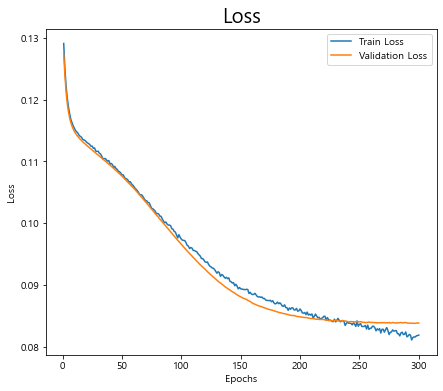

In [1810]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,6))
plt.plot(range(1, N_EPOCHS+1), hist.history['loss'], label='Train Loss')
plt.plot(range(1, N_EPOCHS+1), hist.history['val_loss'], label='Validation Loss')
plt.title('Loss', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [1811]:
loss, acc = model.evaluate(test_dataset)

22/22 [==============================] - 0s 2ms/step - loss: 0.0897 - accuracy: 0.7348
